In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path as path

JSON_PATH = path.join('/app','data', 'prs_por_orga_por_anio_filtrados.json')
print(JSON_PATH)

print('Reading data')
df = pd.read_json(JSON_PATH, lines=True)
print('Done')


/app/data/prs_por_orga_por_anio_filtrados.json
Reading data
Done


In [40]:
df.head()

,_id,month,year,organizationUrl,countStar
0,{'$oid': '5f9612435bacc72c71bfe8dc'},9,2019,"""https://github.com/Pandinosaurus""",8448
1,{'$oid': '5f9612435bacc72c71bfe8dd'},7,2019,"""https://github.com/Mattlk13""",14890
2,{'$oid': '5f9612435bacc72c71bfe8de'},11,2019,"""https://github.com/Pandinosaurus""",8377
3,{'$oid': '5f9612435bacc72c71bfe8df'},12,2019,"""https://github.com/Pandinosaurus""",7739
4,{'$oid': '5f9612435bacc72c71bfe8e0'},11,2019,"""https://github.com/NeatNerdPrime""",6182


In [59]:
df['organizationUrl'] = df['organizationUrl'].str.lower()
df

,_id,month,year,organizationUrl,countStar
0,{'$oid': '5f9612435bacc72c71bfe8dc'},9,2019,"""https://github.com/pandinosaurus""",8448
1,{'$oid': '5f9612435bacc72c71bfe8dd'},7,2019,"""https://github.com/mattlk13""",14890
2,{'$oid': '5f9612435bacc72c71bfe8de'},11,2019,"""https://github.com/pandinosaurus""",8377
3,{'$oid': '5f9612435bacc72c71bfe8df'},12,2019,"""https://github.com/pandinosaurus""",7739
4,{'$oid': '5f9612435bacc72c71bfe8e0'},11,2019,"""https://github.com/neatnerdprime""",6182
...,...,...,...,...,...
3170,{'$oid': '5f9612435bacc72c71bff53e'},12,2019,"""https://github.com/haut-se-oop""",500
3171,{'$oid': '5f9612435bacc72c71bff53f'},12,2017,"""https://github.com/gulajavaministudio""",500
3172,{'$oid': '5f9612435bacc72c71bff540'},3,2019,"""https://github.com/gulajavaministudio""",500
3173,{'$oid': '5f9612435bacc72c71bff541'},5,2019,"""https://github.com/philoserf-contribs""",500


In [60]:
with_counts = df.groupby(["organizationUrl", "month", "year"]).sum('countStar').reset_index()
with_counts

,organizationUrl,month,year,countStar
0,"""https://github.com/18f""",1,2016,681
1,"""https://github.com/18f""",1,2017,854
2,"""https://github.com/18f""",2,2016,825
3,"""https://github.com/18f""",2,2017,923
4,"""https://github.com/18f""",2,2018,532
...,...,...,...,...
3169,"""https://github.com/zys-contribs""",6,2019,1507
3170,"""https://github.com/zys-contribs""",7,2019,1528
3171,"""https://github.com/zys-contribs""",8,2019,1286
3172,"""https://github.com/zys-contribs""",11,2019,620


In [68]:
grouped = with_counts.groupby(["month", "year"]).apply(lambda x: x.sort_values(['countStar'], ascending = False)).reset_index(drop=True)
grouped
final_data = grouped.groupby(["month", "year"]).head(10)
final_data

,organizationUrl,month,year,countStar
0,"""https://github.com/mozilla""",1,2016,1472
1,"""https://github.com/dotnet""",1,2016,1199
2,"""https://github.com/alphagov""",1,2016,965
3,"""https://github.com/docker""",1,2016,958
4,"""https://github.com/guardian""",1,2016,922
...,...,...,...,...
3003,"""https://github.com/fakegit""",12,2019,3014
3004,"""https://github.com/dotnet""",12,2019,2564
3005,"""https://github.com/googleapis""",12,2019,2288
3006,"""https://github.com/azure""",12,2019,2254


In [69]:
plot_data = pd.pivot_table(final_data, index=['year', 'month'], columns=['organizationUrl'])

plot_data

NaN                          NaN   
     4                                  2123.0                          NaN   
     5                                     NaN                          NaN   
     6                                     NaN                          NaN   
     7                                     NaN                          NaN   
     8                                     NaN                          NaN   
     9                                     NaN                          NaN   
     10                                    NaN                          NaN   
     11                                    NaN                          NaN   
     12                                    NaN                          NaN   
2020 1                                     NaN                          NaN   

                                                    \
organizationUrl "https://github.com/pandinosaurus"   
year month                                           
2016 1                                         NaN   
     2                                         NaN   
     3                                         NaN   
     4                                         NaN   
     5                                         NaN   
     6                                         NaN   
     7                                         NaN   
     8                                         NaN   
     9                                         NaN   
     10                                        NaN   
     11                                        NaN   
     12                                        NaN   
2017 1                                         NaN   
     2                                         NaN   
     3                                         NaN   
     4                                         NaN   
     5                                         NaN   
     6                                         NaN   
     7                                         NaN   
     8                                         NaN   
     9                                         NaN   
     10                                        NaN   
     11                                        NaN   
     12                                        NaN   
2018 2                                         NaN   
     3                                         NaN   
     4                                         NaN   
     5                                         NaN   
     6                                         NaN   
     7                                         NaN   
     8                                         NaN   
     9                                         NaN   
     10                                        NaN   
     11                                        NaN   
     12                                        NaN   
2019 1                                         NaN   
     2                                         NaN   
     3                                         NaN   
     4                                         NaN   
     5                                      8723.0   
     6                                      9479.0   
     7                                     10186.0   
     8                                     10106.0   
     9                                      8448.0   
     10                                     9481.0   
     11                                     8377.0   
     12                                     7739.0   
2020 1                                      3802.0   

                                                                              \
organizationUrl "https://github.com/potapy4" "https://github.com/rackerlabs"   
year month                                                                     
2016 1                                   NaN                           695.0   
     2                                   NaN                             NaN   
     3            

<AxesSubplot:xlabel='year,month'>

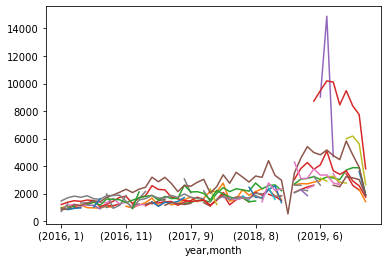

In [70]:
plot_data.plot(legend=False)